In [1]:
"""

INPUT: 
-> Data train

PROCESS:
-> variance threshold (save selected feature names into pickle)
-> Standard Scaling (save scaler into pickle)
-> Genetic Algorithm Features Selection (save result into pickle)

OUTPUT:
-> selected_features_statistical.pkl (list)
-> scaler.pkl (scaler)
-> selected_features_GA.pkl (dictionary)

"""

'\n\nINPUT: \n-> Data train\n\nPROCESS:\n-> variance threshold (save selected feature names into pickle)\n-> Standard Scaling (save scaler into pickle)\n-> Genetic Algorithm Features Selection (save result into pickle)\n\nOUTPUT:\n-> selected_features_statistical.pkl (list)\n-> scaler.pkl (scaler)\n-> selected_features_GA.pkl (dictionary)\n\n'

In [136]:
import pandas as pd
import numpy as np
import joblib
import plotly.graph_objects as go

In [3]:
### Load Train set
train = pd.read_csv('D:\Coding\Machine Learning\Bioinformatics\QSAR study on falcipain inhibitor\Dataset Falcipain\Train.csv')
train

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,FP-2 pIC50 (uM)
0,0,-1.7616,3.103235,63.7293,78.280825,18,18,66,41,25,...,83.993479,2.048621,34.064095,18.736877,12.809614,5788.0,68.0,4.894,216.0,4.786748
1,0,-0.2864,0.082025,35.9367,51.005895,17,18,40,25,15,...,50.633970,2.025359,22.966476,5.077089,12.324973,1713.0,35.0,4.202,128.0,5.236572
2,0,-1.6982,2.883883,67.5532,68.066618,12,12,57,31,26,...,62.201948,2.006514,25.902949,12.501332,6.478960,3056.0,48.0,4.279,160.0,6.853872
3,0,-1.9096,3.646572,25.3604,59.650274,22,23,48,30,18,...,61.653743,2.055125,16.365920,10.101942,6.263978,2695.0,50.0,5.554,158.0,5.337242
4,0,-0.2266,0.051348,76.0728,60.954204,6,6,54,26,28,...,51.539400,1.982285,16.801571,5.118101,9.140872,1828.0,36.0,5.063,128.0,4.314258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,0,-3.0982,9.598843,91.0329,100.488892,18,18,88,44,44,...,88.247274,2.005620,28.550281,13.040374,12.076740,8004.0,56.0,11.177,210.0,6.920819
202,0,-0.3931,0.154528,73.2009,80.554239,18,18,66,43,23,...,87.681842,2.039113,39.120294,18.734180,12.802907,6540.0,74.0,5.287,228.0,4.717831
203,0,-0.4597,0.211324,23.7925,39.802723,12,12,32,21,11,...,42.894845,2.042612,14.181190,10.716204,3.464986,952.0,33.0,4.315,110.0,4.292430
204,0,0.3782,0.143035,80.8866,96.319720,20,22,84,44,40,...,91.145467,2.071488,28.490904,9.714082,18.776823,8184.0,77.0,8.758,238.0,5.283997


In [68]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:, [-1]]

In [5]:
### Load Test set
test = pd.read_csv('D:\Coding\Machine Learning\Bioinformatics\QSAR study on falcipain inhibitor\Dataset Falcipain\Test.csv')
test

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb,FP-2 pIC50 (uM)
0,0,-2.4530,6.017209,70.1618,78.000618,18,18,67,41,26,...,82.665017,2.016220,31.908282,31.908282,0.000000,6076.0,70.0,2.519,214.0,5.423659
1,0,-0.5409,0.292573,150.8291,107.252029,6,6,99,46,53,...,90.237619,1.961687,31.260021,15.819162,15.440859,9434.0,66.0,5.879,222.0,8.018181
2,0,0.4880,0.238144,84.5571,92.196927,16,17,81,42,39,...,87.941112,2.093836,27.912965,18.620374,9.292591,6991.0,86.0,8.780,242.0,6.537602
3,0,1.0195,1.039380,78.1138,88.191548,16,17,77,41,36,...,85.913699,2.095456,27.646474,15.819647,9.280255,6510.0,84.0,9.183,238.0,6.173925
4,0,0.7574,0.573655,19.4795,45.614309,16,17,36,23,13,...,46.973829,2.042340,10.439589,7.405732,3.033857,1342.0,34.0,7.620,118.0,4.718967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0,-1.2223,1.494017,32.4347,65.042239,21,22,54,31,23,...,63.750810,2.056478,17.386120,8.166102,9.220018,2885.0,43.0,6.894,158.0,4.527244
85,0,-1.1975,1.434006,51.3510,55.529446,10,11,48,26,22,...,51.793212,1.992047,25.825999,13.288478,9.027974,1928.0,37.0,3.265,126.0,4.272459
86,0,1.6302,2.657552,51.2062,60.343274,17,18,50,32,18,...,64.059996,2.001875,23.813396,14.104692,0.000000,3290.0,52.0,5.850,166.0,5.309804
87,0,-2.2931,5.258308,70.1726,82.286204,18,18,70,42,28,...,86.014892,2.047974,34.338321,21.520423,12.817898,6267.0,70.0,4.491,220.0,5.056011


In [69]:
X_test = test.iloc[:,:-1]
y_test = test.iloc[:, [-1]]

In [7]:
features_name = X_train.columns.to_list()

# Statistical features selection

## Using Variance Theresholds

In [8]:
from sklearn.feature_selection import VarianceThreshold

In [9]:
selector = VarianceThreshold(threshold=0.5)
selector.fit_transform(X_train)


### Total number of features after variance threshold

len(selector.get_feature_names_out(features_name))

564

In [10]:
### save and export selected features to pickle
selected_features_statistical = selector.get_feature_names_out(features_name)
joblib.dump(selected_features_statistical, 'Dataset Falcipain\selected_features_statistical.pkl')

['Dataset Falcipain\\selected_features_statistical.pkl']

In [11]:
X_train[selected_features_statistical]

,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,...,MW,AMW,WTPT-1,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,-1.7616,3.103235,63.7293,78.280825,18,18,66,41,25,29,...,560.170727,8.487435,83.993479,34.064095,18.736877,12.809614,5788.0,68.0,4.894,216.0
1,-0.2864,0.082025,35.9367,51.005895,17,18,40,25,15,17,...,374.060424,9.351511,50.633970,22.966476,5.077089,12.324973,1713.0,35.0,4.202,128.0
2,-1.6982,2.883883,67.5532,68.066618,12,12,57,31,26,22,...,462.128314,8.107514,62.201948,25.902949,12.501332,6.478960,3056.0,48.0,4.279,160.0
3,-1.9096,3.646572,25.3604,59.650274,22,23,48,30,18,24,...,398.126657,8.294305,61.653743,16.365920,10.101942,6.263978,2695.0,50.0,5.554,158.0
4,-0.2266,0.051348,76.0728,60.954204,6,6,54,26,28,20,...,377.187005,6.984945,51.539400,16.801571,5.118101,9.140872,1828.0,36.0,5.063,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-3.0982,9.598843,91.0329,100.488892,18,18,88,44,44,34,...,620.303242,7.048900,88.247274,28.550281,13.040374,12.076740,8004.0,56.0,11.177,210.0
202,-0.3931,0.154528,73.2009,80.554239,18,18,66,43,23,29,...,656.071818,9.940482,87.681842,39.120294,18.734180,12.802907,6540.0,74.0,5.287,228.0
203,-0.4597,0.211324,23.7925,39.802723,12,12,32,21,11,16,...,281.068808,8.783400,42.894845,14.181190,10.716204,3.464986,952.0,33.0,4.315,110.0
204,0.3782,0.143035,80.8866,96.319720,20,22,84,44,40,34,...,596.311104,7.098942,91.145467,28.490904,9.714082,18.776823,8184.0,77.0,8.758,238.0


# Standarization Data

**Standarization the data to imporve Genetic Algorithm result**

Also save the scaler into pickle for transform the test dataset later on (if needed).

In [70]:
# Standarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Train
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features_name)
X_train_scaled.to_csv('Dataset Falcipain/x_train_scaled.csv', index=False)
y_train.to_csv('Dataset Falcipain/y_train.csv', index=False)

# Test
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features_name)
X_test_scaled.to_csv('Dataset Falcipain/x_test_scaled.csv', index=False)
y_test.to_csv('Dataset Falcipain/y_test.csv', index=False)

### Save the scaler for transform the test sets later on (if needed)
joblib.dump(scaler, 'Dataset Falcipain/scaler.pkl')

['Dataset Falcipain/scaler.pkl']

In [13]:
X_train_scaled[selected_features_statistical]

,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,...,MW,AMW,WTPT-1,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,-0.667307,0.060116,0.023334,0.619897,0.913049,0.784631,0.545121,1.220854,0.031516,0.917177,...,1.040934,0.238029,1.266837,1.524384,1.479466,0.729893,0.899578,1.379152,-0.037628,1.330254
1,0.303730,-0.709409,-0.922499,-0.725249,0.718139,0.784631,-0.794791,-0.692572,-0.822722,-0.832253,...,-0.571242,1.003432,-0.700491,-0.028198,-0.899455,0.628256,-0.708953,-0.844105,-0.301112,-0.723821
2,-0.625575,0.004245,0.153468,0.116153,-0.256411,-0.301376,0.081305,0.024963,0.116939,-0.103324,...,0.191644,-0.098506,-0.018287,0.382621,0.393514,-0.597750,-0.178829,0.031723,-0.271793,0.023115
3,-0.764727,0.198508,-1.282429,-0.298925,1.692690,1.689636,-0.382510,-0.094626,-0.566450,0.188248,...,-0.362769,0.066954,-0.050616,-0.951631,-0.024352,-0.642836,-0.321327,0.166466,0.213671,-0.023568
4,0.343092,-0.717223,0.443405,-0.234618,-1.425871,-1.387382,-0.073300,-0.572983,0.287787,-0.394895,...,-0.544159,-1.092884,-0.647095,-0.890682,-0.892313,-0.039503,-0.663559,-0.776734,0.026719,-0.723821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1.547112,1.714596,0.952525,1.715156,0.913049,0.784631,1.678892,1.579621,1.654566,1.646105,...,1.561830,-1.036232,1.517698,0.752989,0.487391,0.576197,1.774303,0.570695,2.354662,1.190203
202,0.233495,-0.690942,0.345670,0.732018,0.913049,0.784631,0.545121,1.460032,-0.139332,0.917177,...,1.871675,1.525145,1.484353,2.231758,1.478996,0.728487,1.196416,1.783381,0.112009,1.610355
203,0.189656,-0.676476,-1.335788,-1.277767,-0.256411,-0.301376,-1.207071,-1.170928,-1.164417,-0.978039,...,-1.376780,0.500197,-1.156895,-1.257280,0.082625,-1.229831,-1.009344,-0.978848,-0.258086,-1.143973
204,0.741196,-0.693869,0.607228,1.509540,1.302870,1.508635,1.472752,1.579621,1.312871,1.646105,...,1.353999,-0.991905,1.688615,0.744682,-0.091899,1.981316,1.845355,1.985495,1.433613,1.843773


In [14]:
X_test_scaled[selected_features_statistical]

,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nC,...,MW,AMW,WTPT-1,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,-1.122415,0.802327,0.242243,0.606078,0.913049,0.784631,0.596656,1.220854,0.116939,0.917177,...,1.092663,0.204769,1.188493,1.222781,3.773332,-1.956496,1.013261,1.513895,-0.941924,1.283571
1,0.136207,-0.655781,2.987497,2.048700,-1.425871,-1.387382,2.245778,1.818800,2.423380,1.791891,...,1.727252,-1.559139,1.635076,1.132088,0.971331,1.281709,2.338770,1.244410,0.337416,1.470305
2,0.813471,-0.669644,0.732142,1.306212,0.523229,0.603630,1.318147,1.340443,1.227448,1.500320,...,1.154526,-1.010828,1.499643,0.663827,1.459176,-0.007685,1.374440,2.591838,1.441990,1.937140
3,1.163326,-0.465564,0.512864,1.108675,0.523229,0.603630,1.112007,1.220854,0.971176,1.354534,...,1.050403,-0.823425,1.380079,0.626544,0.971415,-0.010272,1.184574,2.457096,1.595435,1.843773
4,0.990801,-0.584187,-1.482567,-0.991151,0.523229,0.603630,-1.000931,-0.931750,-0.993569,-0.540681,...,-1.186026,0.177546,-0.916343,-1.780738,-0.493910,-1.320246,-0.855399,-0.911477,1.000313,-0.957239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,-0.312318,-0.349764,-1.041678,-0.033004,1.497780,1.508635,-0.073300,0.024963,-0.139332,0.334033,...,-0.232423,-0.502562,0.073055,-0.808903,-0.361488,-0.022905,-0.246328,-0.305134,0.723884,-0.023568
85,-0.295994,-0.365049,-0.397922,-0.502156,-0.646231,-0.482377,-0.382510,-0.572983,-0.224756,-0.832253,...,-0.527330,-0.283621,-0.632127,0.371856,0.530600,-0.063180,-0.624086,-0.709362,-0.657880,-0.770505
86,1.565314,-0.053403,-0.402850,-0.264747,0.718139,0.784631,-0.279440,0.144552,-0.566450,0.042462,...,0.225871,0.976928,0.091289,0.090288,0.672747,-1.956496,-0.086462,0.301209,0.326375,0.163166
87,-1.017162,0.609029,0.242611,0.817435,0.913049,0.784631,0.751261,1.340443,0.287787,1.062962,...,1.145057,-0.039478,1.386047,1.562749,1.964234,0.731630,1.088655,1.513895,-0.191073,1.423621


# Metaheuristic features selection

## Using Genetic Algorithm from [ZOOFS Library](https://github.com/jaswinder9051998/zoofs)

#### ZOOFS is a Python library for performing feature selection using a variety of nature inspired wrapper algorithms. The algorithms range from swarm-intelligence to physics based to Evolutionary. It's an easy to use, flexible and powerful tool to reduce your feature size.

In [15]:
### Setting up Global Weight Score
weight_score_global = 0.8

### ZOOFS Library and Dependencies

In [16]:
"""

Zoofs library dependencies

"""
import plotly.graph_objects as go
from abc import ABC, abstractmethod
import numpy as np
import pandas as pd
import logging as log
import scipy
import colorlog
import logging



class BaseOptimizationAlgorithm(ABC):

    def __init__(self,
                 objective_function,
                 n_iteration: int = 1000,
                 timeout: int = None,
                 population_size=50,
                 minimize=True,
                 logger=None,
                 **kwargs):
        self.kwargs=kwargs
        self.objective_function = objective_function
        self.minimize = minimize
        self.population_size = population_size
        self.n_iteration = n_iteration
        self.timeout = timeout
        self.my_logger=logger

    @abstractmethod
    def fit(self):
        pass

    def sigmoid(self, x):
        return 1/(1+np.exp(-x))

    def _evaluate_fitness(self, model, x_train, y_train, x_valid, y_valid, particle_swarm_flag=0,dragon_fly_flag=0):
        scores = []
        for i, individual in enumerate(self.individuals):
            chosen_features = [index for index in range(
                x_train.shape[1]) if individual[index] == 1]
            x_train_copy = x_train.iloc[:, chosen_features]
            x_valid_copy = x_valid.iloc[:, chosen_features]

            feature_hash = '_*_'.join(
                sorted(self.feature_list[chosen_features]))
            if feature_hash in self.feature_score_hash.keys():
                score = self.feature_score_hash[feature_hash]
            else:
                score = self.objective_function(
                    model, x_train_copy, y_train, x_valid_copy, y_valid, **self.kwargs)
                if not(self.minimize):
                    score = -score
#Adding Feature Weight
                weight_score = weight_score_global
                total_feat = X_train[selected_features_statistical].shape[1]
                len_cf = len(chosen_features)
                score_cf = 1 - (len_cf / total_feat)
                weight_cf = 1 - weight_score
                final_score = (weight_score * score) + (weight_cf * score_cf)
                self.feature_score_hash[feature_hash] = final_score

            if score < self.best_score:
                self.best_score = score
                self.best_dim = individual
                self.best_score_dimension = individual
            if particle_swarm_flag:
                if score < self.current_best_scores[i]:
                    self.current_best_scores[i] = score
                    self.current_best_individual_score_dimensions[i] = individual
            if dragon_fly_flag:
                if score > self.worst_score:
                    self.worst_score = score
                    self.worst_dim = individual
            scores.append(score)
        return scores

    def iteration_objective_score_monitor(self, i):
        if self.minimize:
            self.best_results_per_iteration[i] = {'best_score': self.best_score,
                                                  'objective_score': np.array(self.fitness_scores).min(),
                                                  'selected_features': list(self.feature_list[
                                                      np.where(self.individuals[np.array(self.fitness_scores).argmin()])[0]])}
        else:
            self.best_results_per_iteration[i] = {'best_score': -self.best_score,
                                                  'objective_score': -np.array(self.fitness_scores).min(),
                                                  'selected_features': list(self.feature_list[
                                                      np.where(self.individuals[np.array(self.fitness_scores).argmin()])[0]])}

    def initialize_population(self, x):
        self.individuals = np.random.randint(
            0, 2, size=(self.population_size, x.shape[1]))

    def _check_params(self, model, x_train, y_train, x_valid, y_valid):
        if (self.n_iteration <= 0):
            raise ValueError(
                f"n_init should be > 0, got {self.n_iteration} instead.")

        if (self.population_size <= 0):
            raise ValueError(
                f"population_size should be > 0, got {self.population_size} instead.")

        if (not (callable(self.objective_function))):
            raise TypeError(f"objective_function should be a callable function that returns\
                            metric value, got {type(self.objective_function)} instead")

        if y_train is None:
            raise ValueError(
                f"requires y_train to be passed, but the target y is None.")

        if x_train is None:
            raise ValueError(
                f"requires X_train to be passed, but the target X_train is None.")

        if (type(x_train) != pd.core.frame.DataFrame):
            raise TypeError(f" X_train should be of type pandas.core.frame.DataFrame,\
                            got {type(x_train)} instead.")

        if (type(x_valid) != pd.core.frame.DataFrame):
            raise TypeError(f" X_valid should be of type pandas.core.frame.DataFrame,\
                            got {type(x_valid)} instead.")

        if x_train.shape[1] != x_valid.shape[1]:
            raise ValueError(f" X_train and X_valid should have same number of features,\
                             got { x_train.shape[1]},{x_valid.shape[1]} instead.")

        if x_valid is None:
            raise ValueError(
                f"requires X_valid to be passed, but the target X_train is None.")

        if y_valid is None:
            raise ValueError(
                f"requires X_valid to be passed, but the target y_valid is None.")

        return_val = self.objective_function(
            model, x_train, y_train, x_valid, y_valid, **self.kwargs)
        if (not (isinstance(return_val, (int, float)))):
            raise TypeError(
                f"objective_function should return int/float value , got {type(return_val)} instead.")

    def plot_history(self):
        """
        Plot objective score history
        """
        res = pd.DataFrame.from_dict(self.best_results_per_iteration).T
        res.reset_index(inplace=True)
        res.columns = ['iteration', 'best_score',
                       'objective_score', 'selected_features']
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=res['iteration'], y=res['objective_score'],
                                 mode='markers', name='objective_score'))
        fig.add_trace(go.Scatter(x=res['iteration'], y=res['best_score'],
                                 mode='lines+markers',
                                 name='best_score'))
        fig.update_xaxes(title_text='Iteration')
        fig.update_yaxes(title_text='objective_score')
        fig.update_layout(
            title="Optimization History Plot")
#         fig.show()
        return fig

    def _check_individuals(self):
        if (self.individuals.sum(axis=1) == 0).sum() > 0:
            log.warning(str((self.individuals.sum(axis=1) ==
                        0).sum())+' individuals went zero')
            self.individuals[self.individuals.sum(axis=1) == 0] = np.random.randint(0, 2,
                                                                                    (self.individuals[self.individuals.sum(axis=1) == 0].shape[0],
                                                                                     self.individuals[self.individuals.sum(axis=1) == 0].shape[1]))


    def _setup_logger(self):
        logger = logging.getLogger()

        if (logger.hasHandlers()):
            logger.handlers.clear()

        # Logging info level to stdout with colors
        terminal_handler = colorlog.StreamHandler()
        color_formatter = colorlog.ColoredFormatter(
            "%(green)s [ %(asctime)s ] %(reset)s%(message)s",
            datefmt=None,
            reset=True,
            log_colors={
                'DEBUG':    'cyan',
                'INFO':     'green',
                'WARNING':  'yellow',
                'ERROR':    'red',
                'CRITICAL': 'red,bg_white',
            },
            secondary_log_colors={},
            style='%'
        )
        terminal_handler.setLevel(logging.DEBUG)
        terminal_handler.setFormatter(color_formatter)

        # Add handlers to logger
        logger.addHandler(terminal_handler)

        return logger

    
    def verbose_results(self,verbose, i):
        if verbose:
            if i==0:
                if self.my_logger==None:
                    self.my_logger = self._setup_logger()

            fitness_scores = np.array(self.fitness_scores).min() if self.minimize else -np.array(self.fitness_scores).min()
            best_score = self.best_score if self.minimize else -self.best_score

            self.my_logger.warning(f"Finished iteration #{i} with objective value {fitness_scores}. Current best value is {best_score} ")


In [17]:
"""

Genetic Optimization Class from Zoofs library

"""
import numpy as np
import scipy
import plotly.graph_objects as go
import scipy
import time
import warnings


class GeneticOptimization(BaseOptimizationAlgorithm):
    def __init__(self,
                 objective_function,
                 n_iteration: int = 1000,
                 timeout: int = None,
                 population_size=20,
                 selective_pressure=2,
                 elitism=2,
                 mutation_rate=0.05,
                 minimize=True,
                 logger=None,
                 **kwargs):
        """
        Parameters
        ----------
        objective_function : user made function of the signature 'func(model,X_train,y_train,X_test,y_test)'
            The function must return a value, that needs to be minimized/maximized.
        n_iteration : int, default=1000
            Number of time the Optimization algorithm will run
        timeout: int = None
            Stop operation after the given number of second(s).
            If this argument is set to None, the operation is executed without time limitation and n_iteration is followed
        population_size : int, default=50
            Total size of the population
        selective_pressure : int, default=2
            measure of reproductive opportunities for each organism in the population
        elitism : int, default=2
            number of top individuals to be considered as elites
        mutation_rate :  float, default=0.05
            rate of mutation in the population's gene
        minimize : bool, default=True
            Defines if the objective value is to be maximized or minimized
        logger: Logger or None, optional (default=None)
            - accepts `logging.Logger` instance.
            
        **kwargs
            Any extra keyword argument for objective_function
        Attributes
        ----------
        best_feature_list : ndarray of shape (n_features)
            list of features with the best result of the entire run
        """
        super().__init__(objective_function, n_iteration, timeout, population_size, minimize, logger, **kwargs)
        self.n_generations = n_iteration
        self.selective_pressure = selective_pressure
        self.elitism = elitism
        self.mutation_rate = mutation_rate

    def _evaluate_fitness(self, model, x_train, y_train, x_valid, y_valid):
        scores = []
        for individual in self.individuals:
            chosen_features = [index for index in range(
                x_train.shape[1]) if individual[index] == 1]
            x_train_copy = x_train.iloc[:, chosen_features]
            x_valid_copy = x_valid.iloc[:, chosen_features]
            feature_hash = '_*_'.join(
                sorted(self.feature_list[chosen_features]))
            if feature_hash in self.feature_score_hash.keys():
                score = self.feature_score_hash[feature_hash]
            else:
                score = self.objective_function(
                    model, x_train_copy, y_train, x_valid_copy, y_valid, **self.kwargs)
                if self.minimize:
                    score = -score
                self.feature_score_hash[feature_hash] = score
## Adding feature weight 
            total_feat = X_train[selected_features_statistical].shape[1]
            len_cf = len(chosen_features)
            score_cf = 1 - (len_cf / total_feat)
            weight_score = weight_score_global
            weight_cf = 1 - weight_score
            final_score = (weight_score * score) + (weight_cf * score_cf)
            scores.append(final_score)

        self.fitness_scores = scores
        current_best_score = np.max(self.fitness_scores)
        if current_best_score > self.best_score:
            self.best_score = current_best_score
            self.best_feature_set = self.individuals[np.argmax(
                self.fitness_scores), :]

        ranks = scipy.stats.rankdata(scores, method='average')
        self.fitness_ranks = self.selective_pressure * ranks

    def _select_individuals(self, model, x_train, y_train, x_valid, y_valid):
        self._evaluate_fitness(model, x_train, y_train, x_valid, y_valid)

        sorted_individuals_fitness = sorted(
            zip(self.individuals, self.fitness_ranks), key=lambda x: x[1], reverse=True)
        elite_individuals = np.array(
            [individual for individual, fitness in sorted_individuals_fitness[:self.elitism]])

        non_elite_individuals = np.array(
            [individual[0] for individual in sorted_individuals_fitness[self.elitism:]])

        non_elite_individuals_fitness = [
            individual[1] for individual in sorted_individuals_fitness[self.elitism:]]
        selection_probability = non_elite_individuals_fitness / \
            np.sum(non_elite_individuals_fitness)

        selected_indices = np.random.choice(range(
            len(non_elite_individuals)), self.population_size//2, p=selection_probability)
        selected_individuals = non_elite_individuals[selected_indices, :]
        self.fit_individuals = np.vstack(
            (elite_individuals, selected_individuals))

    # Make me a mutant!
    def _mutate(self, array):
        mutated_array = np.copy(array)
        for idx, gene in enumerate(array):
            if np.random.random() < self.mutation_rate:
                array[idx] = 1 if gene == 0 else 0

        return mutated_array

    def _produce_next_generation(self):
        new_population = np.empty(
            shape=(self.population_size, self.individuals.shape[1]), dtype=np.int32)
        for i in range(0, self.population_size, 2):
            parents = self.fit_individuals[np.random.choice(
                self.fit_individuals.shape[0], 2, replace=False), :]
            crossover_index = np.random.randint(0, len(self.individuals[0]))
            new_population[i] = np.hstack(
                (parents[0][:crossover_index], parents[1][crossover_index:]))
            new_population[i+1] = np.hstack(
                (parents[1][:crossover_index], parents[0][crossover_index:]))

            new_population[i] = self._mutate(new_population[i])
            new_population[i+1] = self._mutate(new_population[i+1])
        self.individuals = new_population

    def _verbose_results(self, verbose, i):
        if verbose:
            if i == 0:
                print(
                    "\t\t Best value of metric across iteration \t Best value of metric across population  ")
            if self.minimize:
                print(
                    f"Iteration {i} \t {-np.array(self.fitness_scores).max()} \t\t\t\t\t {-self.best_score} ")
            else:
                print(
                    f"Iteration {i} \t {np.array(self.fitness_scores).max()} \t\t\t\t\t {self.best_score} ")

    def _iteration_objective_score_monitor(self, i):
        if self.minimize:
            self.best_results_per_iteration[i] = {'best_score': -self.best_score,
                                                  'objective_score': -np.array(self.fitness_scores).max(),
                                                  'selected_features': list(self.feature_list[
                                                      np.where(self.individuals[np.array(self.fitness_scores).argmin()])[0]])}
        else:
            self.best_results_per_iteration[i] = {'best_score': self.best_score,
                                                  'objective_score': np.array(self.fitness_scores).max(),
                                                  'selected_features': list(self.feature_list[
                                                      np.where(self.individuals[np.array(self.fitness_scores).argmin()])[0]])}

    def fit(self, model, X_train, y_train, X_valid, y_valid, verbose=True):
        """
        Parameters
        ----------      
        model : machine learning model's object
           machine learning model's object
        X_train : pandas.core.frame.DataFrame of shape (n_samples, n_features)
           Training input samples to be used for machine learning model
        y_train : pandas.core.frame.DataFrame or pandas.core.series.Series of shape (n_samples)
           The target values (class labels in classification, real numbers in regression).
        X_valid : pandas.core.frame.DataFrame of shape (n_samples, n_features)
           Validation input samples
        y_valid : pandas.core.frame.DataFrame or pandas.core.series.Series of shape (n_samples)
            The target values (class labels in classification, real numbers in regression).                
        verbose : bool,default=True
             Print results for iterations
        """
        self._check_params(model, X_train, y_train, X_valid, y_valid)

        self.feature_score_hash = {}
        self.feature_list = np.array(list(X_train.columns))
        self.best_results_per_iteration = {}
        self.best_score = np.inf
        self.best_dim = np.ones(X_train.shape[1])

        self.initialize_population(X_train)
        self.best_score = -1 * float(np.inf)
        self.best_scores = []

        if (self.timeout is not None):
            timeout_upper_limit = time.time() + self.timeout
        else:
            timeout_upper_limit = time.time()
        for i in range(self.n_generations):

            if (self.timeout is not None) & (time.time() > timeout_upper_limit):
                warnings.warn("Timeout occured")
                break
            self._select_individuals(model, X_train, y_train, X_valid, y_valid)
            self._produce_next_generation()
            self.best_scores.append(self.best_score)

            self._iteration_objective_score_monitor(i)
            self._verbose_results(verbose, i)
            self.best_feature_list = list(
                self.feature_list[np.where(self.best_dim)[0]])
        return self.best_feature_list

### Performing GA-SVM Features Selection

In [18]:
"""

Input : X_train(selected_features_statistical)

Output:

linear => selected feature + best_score 20 run
rbf => selected feature + best_score 20 run
poly => selected feature + best_score 20 run


"""

'\n\nInput : X_train(selected_features_statistical)\n\nOutput:\n\nlinear => selected feature + best_score 20 run\nrbf => selected feature + best_score 20 run\npoly => selected feature + best_score 20 run\n\n\n'

In [19]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [20]:
### Preparing X_train for GA Features Selection
X_train = X_train_scaled[selected_features_statistical]

In [21]:
### Dummy x_valid and y_valid (not used in objective function)
X_valid = train.iloc[:,:-1]
X_valid = X_valid[selected_features_statistical]
y_valid = train.iloc[:, [-1]]

In [22]:
# define your own objective function, make sure the function receives four parameters,
#  fit your model and return the objective value ! 
def objective_function_topass(model, X_train, y_train, X_valid, y_valid):      
    # Using CV to calculate scores
    score = cross_val_score(model, X_train, y_train, scoring='r2', cv=5, n_jobs=-1)
    score = score.mean()
    return score

def features_select_GA(model, X_train, y_train, X_valid, y_valid):
    # create object of algorithm
    algo_object=GeneticOptimization(objective_function_topass,n_iteration=50,
                                population_size=20,selective_pressure=2,elitism=2,
                                mutation_rate=0.05,minimize=False)


    # fit the algorithm
    algo_object.fit(model, X_train, y_train.values.ravel(), X_valid, y_valid.values.ravel(), verbose=True)

    #plot your results
    # algo_object.plot_history()

    # extract the best  feature set
    # algo_object.best_feature_list 
    return algo_object

In [24]:
def multiple_run_fs_dataframe(n_runs, model, X_train, y_train, X_valid, y_valid):

    run_id = []
    num_features = []
    objective_scores = []
    best_scores = []
    selected_features = []
    plots = []
    
    
    for i in range(n_runs):
        print("\n\n ----------------------------------------------------------------------------------------")
        print(f"Run Id - {i+1}")
        best_objective_score = 0
        
        solution_obj = features_select_GA(model, X_train, y_train, X_valid, y_valid)
        
        # Best key per GA iteration
        # last_key = max(solution_obj.best_results_per_iteration.keys())
        for j in range(len(solution_obj.best_results_per_iteration)):
            if solution_obj.best_results_per_iteration[j]['objective_score'] > best_objective_score:
                best_objective_score = solution_obj.best_results_per_iteration[j]['objective_score']
                best_key = j
        
        # solution per run time
        solution_objective_score = solution_obj.best_results_per_iteration[best_key]['objective_score']
        solution_best_score = solution_obj.best_results_per_iteration[best_key]['best_score']
        len_solution = len(solution_obj.best_results_per_iteration[best_key]['selected_features'])
        list_selected_features = solution_obj.best_results_per_iteration[best_key]['selected_features']
        plot = solution_obj.plot_history()
        
        # append solution into a list
        run_id.append(i+1)
        num_features.append(len_solution)
        objective_scores.append(solution_objective_score)
        best_scores.append(solution_best_score)
        selected_features.append(list_selected_features)
        plots.append(plot)
        
    # END of LOOP
    
    # Create dataframe of the solutions
    dict_solution = {'run_id': run_id, 'num_features': num_features, 'objective_scores' : objective_scores,
                    'best_scores' : best_scores, 'selected_features' : selected_features, 'plot' : plots}
    df_solution = pd.DataFrame(data=dict_solution)
    
    # return dictionaries of all salution
    return df_solution

### Linear Kernel

In [25]:
### TEST NEW FUNCTION

# Define machine learning model
svr_linear_model = SVR(kernel='linear')
# Multiple run GA with those machine learning model
solutions_linear_df = multiple_run_fs_dataframe(20, svr_linear_model, X_train, y_train, X_valid, y_valid)
solutions_linear_df



 ----------------------------------------------------------------------------------------
Run Id - 1
		 Best value of metric across iteration 	 Best value of metric across population  
Iteration 0 	 0.43852714242069857 					 0.43852714242069857 
Iteration 1 	 0.4079076261800514 					 0.43852714242069857 
Iteration 2 	 0.4462590819656276 					 0.4462590819656276 
Iteration 3 	 0.4605186608070131 					 0.4605186608070131 
Iteration 4 	 0.4605186608070131 					 0.4605186608070131 
Iteration 5 	 0.48771478190020073 					 0.48771478190020073 
Iteration 6 	 0.489472939962385 					 0.489472939962385 
Iteration 7 	 0.5202967698284493 					 0.5202967698284493 
Iteration 8 	 0.5230016781179818 					 0.5230016781179818 
Iteration 9 	 0.5230016781179818 					 0.5230016781179818 
Iteration 10 	 0.5230016781179818 					 0.5230016781179818 
Iteration 11 	 0.5295972780243766 					 0.5295972780243766 
Iteration 12 	 0.5308771873313666 					 0.5308771873313666 
Iteration 13 	 0.5308771873313666 					 

Iteration 29 	 0.6236308078780547 					 0.6236308078780547 
Iteration 30 	 0.6236308078780547 					 0.6236308078780547 
Iteration 31 	 0.6236308078780547 					 0.6236308078780547 
Iteration 32 	 0.6236308078780547 					 0.6236308078780547 
Iteration 33 	 0.6236308078780547 					 0.6236308078780547 
Iteration 34 	 0.6236308078780547 					 0.6236308078780547 
Iteration 35 	 0.6236308078780547 					 0.6236308078780547 
Iteration 36 	 0.6236308078780547 					 0.6236308078780547 
Iteration 37 	 0.6236308078780547 					 0.6236308078780547 
Iteration 38 	 0.6236308078780547 					 0.6236308078780547 
Iteration 39 	 0.6236308078780547 					 0.6236308078780547 
Iteration 40 	 0.6236308078780547 					 0.6236308078780547 
Iteration 41 	 0.6236308078780547 					 0.6236308078780547 
Iteration 42 	 0.6236308078780547 					 0.6236308078780547 
Iteration 43 	 0.6236308078780547 					 0.6236308078780547 
Iteration 44 	 0.6236308078780547 					 0.6236308078780547 
Iteration 45 	 0.6236308078780547 					 

Iteration 8 	 0.3936597019615179 					 0.45750188358172444 
Iteration 9 	 0.3936597019615179 					 0.45750188358172444 
Iteration 10 	 0.39245979650262797 					 0.45750188358172444 
Iteration 11 	 0.39245979650262797 					 0.45750188358172444 
Iteration 12 	 0.404700497578267 					 0.45750188358172444 
Iteration 13 	 0.404700497578267 					 0.45750188358172444 
Iteration 14 	 0.404700497578267 					 0.45750188358172444 
Iteration 15 	 0.404700497578267 					 0.45750188358172444 
Iteration 16 	 0.404700497578267 					 0.45750188358172444 
Iteration 17 	 0.404700497578267 					 0.45750188358172444 
Iteration 18 	 0.404700497578267 					 0.45750188358172444 
Iteration 19 	 0.404700497578267 					 0.45750188358172444 
Iteration 20 	 0.404700497578267 					 0.45750188358172444 
Iteration 21 	 0.404700497578267 					 0.45750188358172444 
Iteration 22 	 0.404700497578267 					 0.45750188358172444 
Iteration 23 	 0.404700497578267 					 0.45750188358172444 
Iteration 24 	 0.404700497578267 			

Iteration 43 	 0.4991171815748396 					 0.5101628154689899 
Iteration 44 	 0.4991171815748396 					 0.5101628154689899 
Iteration 45 	 0.4991171815748396 					 0.5101628154689899 
Iteration 46 	 0.4991171815748396 					 0.5101628154689899 
Iteration 47 	 0.4991171815748396 					 0.5101628154689899 
Iteration 48 	 0.4991171815748396 					 0.5101628154689899 
Iteration 49 	 0.4991171815748396 					 0.5101628154689899 


 ----------------------------------------------------------------------------------------
Run Id - 9
		 Best value of metric across iteration 	 Best value of metric across population  
Iteration 0 	 0.39189015682571604 					 0.39189015682571604 
Iteration 1 	 0.4433381742200294 					 0.4433381742200294 
Iteration 2 	 0.46472870022088886 					 0.46472870022088886 
Iteration 3 	 0.47185714232551357 					 0.47185714232551357 
Iteration 4 	 0.49833022407625316 					 0.49833022407625316 
Iteration 5 	 0.46993329499553027 					 0.49833022407625316 
Iteration 6 	 0.4986220666260

Iteration 21 	 0.505887933220537 					 0.505887933220537 
Iteration 22 	 0.505887933220537 					 0.505887933220537 
Iteration 23 	 0.505887933220537 					 0.505887933220537 
Iteration 24 	 0.505887933220537 					 0.505887933220537 
Iteration 25 	 0.505887933220537 					 0.505887933220537 
Iteration 26 	 0.505887933220537 					 0.505887933220537 
Iteration 27 	 0.505887933220537 					 0.505887933220537 
Iteration 28 	 0.505887933220537 					 0.505887933220537 
Iteration 29 	 0.505887933220537 					 0.505887933220537 
Iteration 30 	 0.505887933220537 					 0.505887933220537 
Iteration 31 	 0.505887933220537 					 0.505887933220537 
Iteration 32 	 0.505887933220537 					 0.505887933220537 
Iteration 33 	 0.505887933220537 					 0.505887933220537 
Iteration 34 	 0.505887933220537 					 0.505887933220537 
Iteration 35 	 0.505887933220537 					 0.505887933220537 
Iteration 36 	 0.505887933220537 					 0.505887933220537 
Iteration 37 	 0.505887933220537 					 0.505887933220537 
Iteration 38 	

Iteration 1 	 0.5089066498525281 					 0.5089066498525281 
Iteration 2 	 0.5137921598371448 					 0.5137921598371448 
Iteration 3 	 0.5073230693282502 					 0.5137921598371448 
Iteration 4 	 0.5189003734602734 					 0.5189003734602734 
Iteration 5 	 0.48005988388622073 					 0.5189003734602734 
Iteration 6 	 0.526322985330538 					 0.526322985330538 
Iteration 7 	 0.526322985330538 					 0.526322985330538 
Iteration 8 	 0.526322985330538 					 0.526322985330538 
Iteration 9 	 0.526322985330538 					 0.526322985330538 
Iteration 10 	 0.526322985330538 					 0.526322985330538 
Iteration 11 	 0.526322985330538 					 0.526322985330538 
Iteration 12 	 0.526322985330538 					 0.526322985330538 
Iteration 13 	 0.5189003734602734 					 0.526322985330538 
Iteration 14 	 0.5189003734602734 					 0.526322985330538 
Iteration 15 	 0.5189003734602734 					 0.526322985330538 
Iteration 16 	 0.5189003734602734 					 0.526322985330538 
Iteration 17 	 0.5189003734602734 					 0.526322985330538 
Iterati

Iteration 33 	 0.5886669721981198 					 0.5886669721981198 
Iteration 34 	 0.5886669721981198 					 0.5886669721981198 
Iteration 35 	 0.5886669721981198 					 0.5886669721981198 
Iteration 36 	 0.5886669721981198 					 0.5886669721981198 
Iteration 37 	 0.5886669721981198 					 0.5886669721981198 
Iteration 38 	 0.5886669721981198 					 0.5886669721981198 
Iteration 39 	 0.5886669721981198 					 0.5886669721981198 
Iteration 40 	 0.5886669721981198 					 0.5886669721981198 
Iteration 41 	 0.5886669721981198 					 0.5886669721981198 
Iteration 42 	 0.5886669721981198 					 0.5886669721981198 
Iteration 43 	 0.5886669721981198 					 0.5886669721981198 
Iteration 44 	 0.5886669721981198 					 0.5886669721981198 
Iteration 45 	 0.5886669721981198 					 0.5886669721981198 
Iteration 46 	 0.5886669721981198 					 0.5886669721981198 
Iteration 47 	 0.5886669721981198 					 0.5886669721981198 
Iteration 48 	 0.5886669721981198 					 0.5886669721981198 
Iteration 49 	 0.5886669721981198 					 

Iteration 13 	 0.5279452119879469 					 0.562435345410438 
Iteration 14 	 0.5279452119879469 					 0.562435345410438 
Iteration 15 	 0.5367934869706434 					 0.562435345410438 
Iteration 16 	 0.5367934869706434 					 0.562435345410438 
Iteration 17 	 0.5367934869706434 					 0.562435345410438 
Iteration 18 	 0.5367934869706434 					 0.562435345410438 
Iteration 19 	 0.5367934869706434 					 0.562435345410438 
Iteration 20 	 0.5367934869706434 					 0.562435345410438 
Iteration 21 	 0.5367934869706434 					 0.562435345410438 
Iteration 22 	 0.5367934869706434 					 0.562435345410438 
Iteration 23 	 0.5367934869706434 					 0.562435345410438 
Iteration 24 	 0.5367934869706434 					 0.562435345410438 
Iteration 25 	 0.5142316391768653 					 0.562435345410438 
Iteration 26 	 0.5142316391768653 					 0.562435345410438 
Iteration 27 	 0.5142316391768653 					 0.562435345410438 
Iteration 28 	 0.5142316391768653 					 0.562435345410438 
Iteration 29 	 0.5142316391768653 					 0.56243534541043

,run_id,num_features,objective_scores,best_scores,selected_features,plot
0,1,271,0.530877,0.530877,"[ALogP, AMR, apol, nAtom, nHeavyAtom, nC, nO, ...","Figure({\n 'data': [{'mode': 'markers',\n ..."
1,2,268,0.579846,0.579846,"[apol, naAromAtom, nAromBond, nAtom, nHeavyAto...","Figure({\n 'data': [{'mode': 'markers',\n ..."
2,3,256,0.623631,0.623631,"[AMR, nAromBond, nH, nO, ATS1m, ATS5m, ATS7m, ...","Figure({\n 'data': [{'mode': 'markers',\n ..."
3,4,258,0.545664,0.545664,"[apol, nAromBond, nAtom, nHeavyAtom, nH, nS, A...","Figure({\n 'data': [{'mode': 'markers',\n ..."
4,5,275,0.530853,0.530853,"[ALogP, AMR, nAtom, nHeavyAtom, nO, nX, ATS0m,...","Figure({\n 'data': [{'mode': 'markers',\n ..."
5,6,286,0.457502,0.457502,"[ALogP, AMR, naAromAtom, nAtom, nC, nO, nS, nX...","Figure({\n 'data': [{'mode': 'markers',\n ..."
6,7,291,0.496006,0.496006,"[ALogP, ALogp2, apol, nAromBond, nC, nN, ATS4m...","Figure({\n 'data': [{'mode': 'markers',\n ..."
7,8,292,0.510163,0.510163,"[ALogp2, AMR, naAromAtom, nAromBond, nAtom, nH...","Figure({\n 'data': [{'mode': 'markers',\n ..."
8,9,293,0.518367,0.518367,"[ALogp2, AMR, nAromBond, nAtom, nH, nO, nS, nX...","Figure({\n 'data': [{'mode': 'markers',\n ..."
9,10,279,0.431215,0.431215,"[AMR, apol, nAtom, nHeavyAtom, nH, nC, nN, nO,...","Figure({\n 'data': [{'mode': 'markers',\n ..."


### RBF Kernel

In [26]:
# Define machine learning model
svr_rbf_model = SVR(kernel='rbf')
# Multiple run GA with those machine learning model
solutions_rbf_df = multiple_run_fs_dataframe(20, svr_rbf_model, X_train, y_train, X_valid, y_valid)
solutions_rbf_df



 ----------------------------------------------------------------------------------------
Run Id - 1
		 Best value of metric across iteration 	 Best value of metric across population  
Iteration 0 	 0.6392093050534173 					 0.6392093050534173 
Iteration 1 	 0.6388458201057494 					 0.6392093050534173 
Iteration 2 	 0.6398702591903257 					 0.6398702591903257 
Iteration 3 	 0.642197473980474 					 0.642197473980474 
Iteration 4 	 0.6450996557721151 					 0.6450996557721151 
Iteration 5 	 0.64346389696778 					 0.6450996557721151 
Iteration 6 	 0.6464377522114282 					 0.6464377522114282 
Iteration 7 	 0.648660494260693 					 0.648660494260693 
Iteration 8 	 0.6502884054473238 					 0.6502884054473238 
Iteration 9 	 0.6500183620621938 					 0.6502884054473238 
Iteration 10 	 0.6516920131307535 					 0.6516920131307535 
Iteration 11 	 0.6502884054473238 					 0.6516920131307535 
Iteration 12 	 0.6518048706769053 					 0.6518048706769053 
Iteration 13 	 0.6485705155933875 					 0.6518048

Iteration 28 	 0.6591290220846221 					 0.6591290220846221 
Iteration 29 	 0.6591290220846221 					 0.6591290220846221 
Iteration 30 	 0.6591290220846221 					 0.6591290220846221 
Iteration 31 	 0.6591290220846221 					 0.6591290220846221 
Iteration 32 	 0.6591290220846221 					 0.6591290220846221 
Iteration 33 	 0.6591290220846221 					 0.6591290220846221 
Iteration 34 	 0.6591290220846221 					 0.6591290220846221 
Iteration 35 	 0.6591290220846221 					 0.6591290220846221 
Iteration 36 	 0.6591290220846221 					 0.6591290220846221 
Iteration 37 	 0.6591290220846221 					 0.6591290220846221 
Iteration 38 	 0.6591290220846221 					 0.6591290220846221 
Iteration 39 	 0.6591290220846221 					 0.6591290220846221 
Iteration 40 	 0.6591290220846221 					 0.6591290220846221 
Iteration 41 	 0.6591290220846221 					 0.6591290220846221 
Iteration 42 	 0.6591290220846221 					 0.6591290220846221 
Iteration 43 	 0.6591290220846221 					 0.6591290220846221 
Iteration 44 	 0.6591290220846221 					 

Iteration 6 	 0.6502201369634245 					 0.6506938174933578 
Iteration 7 	 0.6502201369634245 					 0.6506938174933578 
Iteration 8 	 0.6502201369634245 					 0.6506938174933578 
Iteration 9 	 0.6502201369634245 					 0.6506938174933578 
Iteration 10 	 0.6528537708214817 					 0.6528537708214817 
Iteration 11 	 0.6518466029803567 					 0.6528537708214817 
Iteration 12 	 0.6518466029803567 					 0.6528537708214817 
Iteration 13 	 0.6518466029803567 					 0.6528537708214817 
Iteration 14 	 0.6521080227862636 					 0.6528537708214817 
Iteration 15 	 0.6518466029803567 					 0.6528537708214817 
Iteration 16 	 0.6518466029803567 					 0.6528537708214817 
Iteration 17 	 0.6518466029803567 					 0.6528537708214817 
Iteration 18 	 0.6518466029803567 					 0.6528537708214817 
Iteration 19 	 0.6518466029803567 					 0.6528537708214817 
Iteration 20 	 0.6518466029803567 					 0.6528537708214817 
Iteration 21 	 0.6518466029803567 					 0.6528537708214817 
Iteration 22 	 0.6518466029803567 					 0.65

Iteration 41 	 0.6579086173405939 					 0.6584571469627698 
Iteration 42 	 0.6579086173405939 					 0.6584571469627698 
Iteration 43 	 0.6579086173405939 					 0.6584571469627698 
Iteration 44 	 0.6579086173405939 					 0.6584571469627698 
Iteration 45 	 0.6579086173405939 					 0.6584571469627698 
Iteration 46 	 0.6579086173405939 					 0.6584571469627698 
Iteration 47 	 0.6579086173405939 					 0.6584571469627698 
Iteration 48 	 0.6579086173405939 					 0.6584571469627698 
Iteration 49 	 0.6579086173405939 					 0.6584571469627698 


 ----------------------------------------------------------------------------------------
Run Id - 9
		 Best value of metric across iteration 	 Best value of metric across population  
Iteration 0 	 0.6411034889693207 					 0.6411034889693207 
Iteration 1 	 0.6434138547318649 					 0.6434138547318649 
Iteration 2 	 0.6439618189222248 					 0.6439618189222248 
Iteration 3 	 0.6448676580868264 					 0.6448676580868264 
Iteration 4 	 0.6490497365397763 				

Iteration 23 	 0.6644072958237273 					 0.6644072958237273 
Iteration 24 	 0.6644072958237273 					 0.6644072958237273 
Iteration 25 	 0.6644072958237273 					 0.6644072958237273 
Iteration 26 	 0.6644072958237273 					 0.6644072958237273 
Iteration 27 	 0.6644072958237273 					 0.6644072958237273 
Iteration 28 	 0.6644072958237273 					 0.6644072958237273 
Iteration 29 	 0.6644072958237273 					 0.6644072958237273 
Iteration 30 	 0.6644072958237273 					 0.6644072958237273 
Iteration 31 	 0.6644072958237273 					 0.6644072958237273 
Iteration 32 	 0.6644072958237273 					 0.6644072958237273 
Iteration 33 	 0.6644072958237273 					 0.6644072958237273 
Iteration 34 	 0.6644072958237273 					 0.6644072958237273 
Iteration 35 	 0.6644072958237273 					 0.6644072958237273 
Iteration 36 	 0.6644072958237273 					 0.6644072958237273 
Iteration 37 	 0.6644072958237273 					 0.6644072958237273 
Iteration 38 	 0.6644072958237273 					 0.6644072958237273 
Iteration 39 	 0.6644072958237273 					 

Iteration 1 	 0.647207026712899 					 0.647207026712899 
Iteration 2 	 0.6467345210307562 					 0.647207026712899 
Iteration 3 	 0.6466756699332832 					 0.647207026712899 
Iteration 4 	 0.6516498427342137 					 0.6516498427342137 
Iteration 5 	 0.6516498427342137 					 0.6516498427342137 
Iteration 6 	 0.6533402599421733 					 0.6533402599421733 
Iteration 7 	 0.6573034567157735 					 0.6573034567157735 
Iteration 8 	 0.6571145355891107 					 0.6573034567157735 
Iteration 9 	 0.6593484495899347 					 0.6593484495899347 
Iteration 10 	 0.6593484495899347 					 0.6593484495899347 
Iteration 11 	 0.6593484495899347 					 0.6593484495899347 
Iteration 12 	 0.6593484495899347 					 0.6593484495899347 
Iteration 13 	 0.6612118184635978 					 0.6612118184635978 
Iteration 14 	 0.6612118184635978 					 0.6612118184635978 
Iteration 15 	 0.6612118184635978 					 0.6612118184635978 
Iteration 16 	 0.6623812505503548 					 0.6623812505503548 
Iteration 17 	 0.6623812505503548 					 0.66238125055

Iteration 33 	 0.6603009623512321 					 0.661676332403523 
Iteration 34 	 0.6603009623512321 					 0.661676332403523 
Iteration 35 	 0.6603009623512321 					 0.661676332403523 
Iteration 36 	 0.6603009623512321 					 0.661676332403523 
Iteration 37 	 0.6603009623512321 					 0.661676332403523 
Iteration 38 	 0.6603009623512321 					 0.661676332403523 
Iteration 39 	 0.6603009623512321 					 0.661676332403523 
Iteration 40 	 0.6603009623512321 					 0.661676332403523 
Iteration 41 	 0.6603009623512321 					 0.661676332403523 
Iteration 42 	 0.6603009623512321 					 0.661676332403523 
Iteration 43 	 0.6603009623512321 					 0.661676332403523 
Iteration 44 	 0.6603009623512321 					 0.661676332403523 
Iteration 45 	 0.6603009623512321 					 0.661676332403523 
Iteration 46 	 0.6603009623512321 					 0.661676332403523 
Iteration 47 	 0.6603009623512321 					 0.661676332403523 
Iteration 48 	 0.6603009623512321 					 0.661676332403523 
Iteration 49 	 0.6603009623512321 					 0.66167633240352

Iteration 15 	 0.6484256606871954 					 0.6484256606871954 
Iteration 16 	 0.6484256606871954 					 0.6484256606871954 
Iteration 17 	 0.6484256606871954 					 0.6484256606871954 
Iteration 18 	 0.6484256606871954 					 0.6484256606871954 
Iteration 19 	 0.6484256606871954 					 0.6484256606871954 
Iteration 20 	 0.6484256606871954 					 0.6484256606871954 
Iteration 21 	 0.6484256606871954 					 0.6484256606871954 
Iteration 22 	 0.6484256606871954 					 0.6484256606871954 
Iteration 23 	 0.6484256606871954 					 0.6484256606871954 
Iteration 24 	 0.6484256606871954 					 0.6484256606871954 
Iteration 25 	 0.6484256606871954 					 0.6484256606871954 
Iteration 26 	 0.6484256606871954 					 0.6484256606871954 
Iteration 27 	 0.6484256606871954 					 0.6484256606871954 
Iteration 28 	 0.6484256606871954 					 0.6484256606871954 
Iteration 29 	 0.6484256606871954 					 0.6484256606871954 
Iteration 30 	 0.6484256606871954 					 0.6484256606871954 
Iteration 31 	 0.6484256606871954 					 

,run_id,num_features,objective_scores,best_scores,selected_features,plot
0,1,276,0.651805,0.651805,"[ALogP, ALogp2, nAromBond, nH, nC, nN, nO, ATS...","Figure({\n 'data': [{'mode': 'markers',\n ..."
1,2,264,0.654527,0.654527,"[ALogP, AMR, nAromBond, nHeavyAtom, nS, nX, AT...","Figure({\n 'data': [{'mode': 'markers',\n ..."
2,3,266,0.659129,0.659129,"[ALogP, apol, naAromAtom, nAtom, nO, nS, ATS0m...","Figure({\n 'data': [{'mode': 'markers',\n ..."
3,4,261,0.653430,0.653430,"[ALogP, nAromBond, nO, nX, ATS4m, ATS7m, ATS0v...","Figure({\n 'data': [{'mode': 'markers',\n ..."
4,5,268,0.651324,0.651324,"[ALogP, AMR, naAromAtom, nAromBond, nAtom, nO,...","Figure({\n 'data': [{'mode': 'markers',\n ..."
5,6,275,0.652854,0.652854,"[ALogP, AMR, naAromAtom, nAromBond, nHeavyAtom...","Figure({\n 'data': [{'mode': 'markers',\n ..."
6,7,249,0.657937,0.657937,"[AMR, nAromBond, nS, nX, ATS0m, ATS1m, ATS5m, ...","Figure({\n 'data': [{'mode': 'markers',\n ..."
7,8,268,0.658457,0.658457,"[ALogp2, AMR, apol, naAromAtom, nAromBond, nHe...","Figure({\n 'data': [{'mode': 'markers',\n ..."
8,9,264,0.652922,0.652922,"[ALogp2, apol, nAromBond, nAtom, nHeavyAtom, A...","Figure({\n 'data': [{'mode': 'markers',\n ..."
9,10,273,0.662061,0.662061,"[apol, naAromAtom, nHeavyAtom, nO, nS, nX, ATS...","Figure({\n 'data': [{'mode': 'markers',\n ..."


### Poly Kernel

In [28]:
# Define machine learning model
svr_poly_model = SVR(kernel='poly')
# Multiple run GA with those machine learning model
solutions_poly_df = multiple_run_fs_dataframe(20, svr_poly_model, X_train, y_train, X_valid, y_valid)
solutions_poly_df



 ----------------------------------------------------------------------------------------
Run Id - 1
		 Best value of metric across iteration 	 Best value of metric across population  
Iteration 0 	 0.5042779210297896 					 0.5042779210297896 
Iteration 1 	 0.5089528888677033 					 0.5089528888677033 
Iteration 2 	 0.5121584123103118 					 0.5121584123103118 
Iteration 3 	 0.5187324392027437 					 0.5187324392027437 
Iteration 4 	 0.5217567075371714 					 0.5217567075371714 
Iteration 5 	 0.5197820186842073 					 0.5217567075371714 
Iteration 6 	 0.5213792586003788 					 0.5217567075371714 
Iteration 7 	 0.5197820186842073 					 0.5217567075371714 
Iteration 8 	 0.519874732496674 					 0.5217567075371714 
Iteration 9 	 0.5205347774005603 					 0.5217567075371714 
Iteration 10 	 0.5217997280676026 					 0.5217997280676026 
Iteration 11 	 0.5217997280676026 					 0.5217997280676026 
Iteration 12 	 0.5225853317497222 					 0.5225853317497222 
Iteration 13 	 0.5206774739973142 					 0.52

Iteration 29 	 0.521124142710802 					 0.521124142710802 
Iteration 30 	 0.521124142710802 					 0.521124142710802 
Iteration 31 	 0.521124142710802 					 0.521124142710802 
Iteration 32 	 0.521124142710802 					 0.521124142710802 
Iteration 33 	 0.521124142710802 					 0.521124142710802 
Iteration 34 	 0.521124142710802 					 0.521124142710802 
Iteration 35 	 0.521124142710802 					 0.521124142710802 
Iteration 36 	 0.521124142710802 					 0.521124142710802 
Iteration 37 	 0.521124142710802 					 0.521124142710802 
Iteration 38 	 0.521124142710802 					 0.521124142710802 
Iteration 39 	 0.521124142710802 					 0.521124142710802 
Iteration 40 	 0.521124142710802 					 0.521124142710802 
Iteration 41 	 0.521124142710802 					 0.521124142710802 
Iteration 42 	 0.521124142710802 					 0.521124142710802 
Iteration 43 	 0.521124142710802 					 0.521124142710802 
Iteration 44 	 0.521124142710802 					 0.521124142710802 
Iteration 45 	 0.521124142710802 					 0.521124142710802 
Iteration 46 	

Iteration 8 	 0.5110824033849367 					 0.5110824033849367 
Iteration 9 	 0.5110824033849367 					 0.5110824033849367 
Iteration 10 	 0.5103677365904401 					 0.5110824033849367 
Iteration 11 	 0.5103677365904401 					 0.5110824033849367 
Iteration 12 	 0.5101297422189246 					 0.5110824033849367 
Iteration 13 	 0.5118638950773066 					 0.5118638950773066 
Iteration 14 	 0.5118638950773066 					 0.5118638950773066 
Iteration 15 	 0.5118638950773066 					 0.5118638950773066 
Iteration 16 	 0.5118638950773066 					 0.5118638950773066 
Iteration 17 	 0.5118638950773066 					 0.5118638950773066 
Iteration 18 	 0.5118638950773066 					 0.5118638950773066 
Iteration 19 	 0.5118638950773066 					 0.5118638950773066 
Iteration 20 	 0.5118638950773066 					 0.5118638950773066 
Iteration 21 	 0.5118638950773066 					 0.5118638950773066 
Iteration 22 	 0.5118638950773066 					 0.5118638950773066 
Iteration 23 	 0.5118638950773066 					 0.5118638950773066 
Iteration 24 	 0.5118638950773066 					 0.

Iteration 40 	 0.5211648954282184 					 0.5218462144785234 
Iteration 41 	 0.5211648954282184 					 0.5218462144785234 
Iteration 42 	 0.5211648954282184 					 0.5218462144785234 
Iteration 43 	 0.5211648954282184 					 0.5218462144785234 
Iteration 44 	 0.5211648954282184 					 0.5218462144785234 
Iteration 45 	 0.5211648954282184 					 0.5218462144785234 
Iteration 46 	 0.5211648954282184 					 0.5218462144785234 
Iteration 47 	 0.5211648954282184 					 0.5218462144785234 
Iteration 48 	 0.5211648954282184 					 0.5218462144785234 
Iteration 49 	 0.5211648954282184 					 0.5218462144785234 


 ----------------------------------------------------------------------------------------
Run Id - 9
		 Best value of metric across iteration 	 Best value of metric across population  
Iteration 0 	 0.527102169459776 					 0.527102169459776 
Iteration 1 	 0.5272657709414783 					 0.5272657709414783 
Iteration 2 	 0.5294177373794026 					 0.5294177373794026 
Iteration 3 	 0.5381960982526871 					

Iteration 19 	 0.5241431239108901 					 0.5292614357000572 
Iteration 20 	 0.5241431239108901 					 0.5292614357000572 
Iteration 21 	 0.5241431239108901 					 0.5292614357000572 
Iteration 22 	 0.5241431239108901 					 0.5292614357000572 
Iteration 23 	 0.5241431239108901 					 0.5292614357000572 
Iteration 24 	 0.5241431239108901 					 0.5292614357000572 
Iteration 25 	 0.5241431239108901 					 0.5292614357000572 
Iteration 26 	 0.5241431239108901 					 0.5292614357000572 
Iteration 27 	 0.5241431239108901 					 0.5292614357000572 
Iteration 28 	 0.5241431239108901 					 0.5292614357000572 
Iteration 29 	 0.5241431239108901 					 0.5292614357000572 
Iteration 30 	 0.5241431239108901 					 0.5292614357000572 
Iteration 31 	 0.5241431239108901 					 0.5292614357000572 
Iteration 32 	 0.5241431239108901 					 0.5292614357000572 
Iteration 33 	 0.5241431239108901 					 0.5292614357000572 
Iteration 34 	 0.5241431239108901 					 0.5292614357000572 
Iteration 35 	 0.5241431239108901 					 

		 Best value of metric across iteration 	 Best value of metric across population  
Iteration 0 	 0.5109721554434203 					 0.5109721554434203 
Iteration 1 	 0.5170717727451691 					 0.5170717727451691 
Iteration 2 	 0.5165721082695864 					 0.5170717727451691 
Iteration 3 	 0.5170717727451691 					 0.5170717727451691 
Iteration 4 	 0.5221795099052295 					 0.5221795099052295 
Iteration 5 	 0.5207004303108256 					 0.5221795099052295 
Iteration 6 	 0.5207004303108256 					 0.5221795099052295 
Iteration 7 	 0.5175005547997126 					 0.5221795099052295 
Iteration 8 	 0.5175005547997126 					 0.5221795099052295 
Iteration 9 	 0.5175005547997126 					 0.5221795099052295 
Iteration 10 	 0.5195953908498578 					 0.5221795099052295 
Iteration 11 	 0.5175005547997126 					 0.5221795099052295 
Iteration 12 	 0.5175005547997126 					 0.5221795099052295 
Iteration 13 	 0.5175005547997126 					 0.5221795099052295 
Iteration 14 	 0.5175005547997126 					 0.5221795099052295 
Iteration 15 	 0.517500554

Iteration 34 	 0.535752873527636 					 0.535752873527636 
Iteration 35 	 0.535752873527636 					 0.535752873527636 
Iteration 36 	 0.535752873527636 					 0.535752873527636 
Iteration 37 	 0.535752873527636 					 0.535752873527636 
Iteration 38 	 0.535752873527636 					 0.535752873527636 
Iteration 39 	 0.535752873527636 					 0.535752873527636 
Iteration 40 	 0.535752873527636 					 0.535752873527636 
Iteration 41 	 0.535752873527636 					 0.535752873527636 
Iteration 42 	 0.535752873527636 					 0.535752873527636 
Iteration 43 	 0.535752873527636 					 0.535752873527636 
Iteration 44 	 0.535752873527636 					 0.535752873527636 
Iteration 45 	 0.535752873527636 					 0.535752873527636 
Iteration 46 	 0.535752873527636 					 0.535752873527636 
Iteration 47 	 0.535752873527636 					 0.535752873527636 
Iteration 48 	 0.535752873527636 					 0.535752873527636 
Iteration 49 	 0.535752873527636 					 0.535752873527636 


 ---------------------------------------------------------------------

Iteration 13 	 0.5262984393866769 					 0.5262984393866769 
Iteration 14 	 0.5257533570745699 					 0.5262984393866769 
Iteration 15 	 0.5262984393866769 					 0.5262984393866769 
Iteration 16 	 0.5262984393866769 					 0.5262984393866769 
Iteration 17 	 0.5268571066391631 					 0.5268571066391631 
Iteration 18 	 0.5312763391706221 					 0.5312763391706221 
Iteration 19 	 0.5312763391706221 					 0.5312763391706221 
Iteration 20 	 0.5312763391706221 					 0.5312763391706221 
Iteration 21 	 0.5312763391706221 					 0.5312763391706221 
Iteration 22 	 0.5312763391706221 					 0.5312763391706221 
Iteration 23 	 0.5312763391706221 					 0.5312763391706221 
Iteration 24 	 0.5312763391706221 					 0.5312763391706221 
Iteration 25 	 0.5312763391706221 					 0.5312763391706221 
Iteration 26 	 0.5326175294089497 					 0.5326175294089497 
Iteration 27 	 0.5312763391706221 					 0.5326175294089497 
Iteration 28 	 0.5312763391706221 					 0.5326175294089497 
Iteration 29 	 0.5312763391706221 					 

,run_id,num_features,objective_scores,best_scores,selected_features,plot
0,1,277,0.522585,0.522585,"[ALogp2, apol, naAromAtom, nAromBond, nAtom, n...","Figure({\n 'data': [{'mode': 'markers',\n ..."
1,2,288,0.535462,0.535462,"[ALogP, ALogp2, AMR, apol, nAtom, nHeavyAtom, ...","Figure({\n 'data': [{'mode': 'markers',\n ..."
2,3,251,0.521124,0.521124,"[ALogP, nAromBond, nAtom, nHeavyAtom, nC, nO, ...","Figure({\n 'data': [{'mode': 'markers',\n ..."
3,4,246,0.523538,0.523538,"[ALogP, apol, naAromAtom, nAromBond, nO, nX, A...","Figure({\n 'data': [{'mode': 'markers',\n ..."
4,5,262,0.553236,0.553236,"[AMR, nAtom, nC, nX, ATS1m, ATS4m, ATS5m, ATS1...","Figure({\n 'data': [{'mode': 'markers',\n ..."
5,6,274,0.511864,0.511864,"[ALogP, AMR, apol, nHeavyAtom, nH, nC, ATS1m, ...","Figure({\n 'data': [{'mode': 'markers',\n ..."
6,7,275,0.549449,0.549449,"[ALogP, AMR, apol, naAromAtom, nAromBond, nAto...","Figure({\n 'data': [{'mode': 'markers',\n ..."
7,8,275,0.521846,0.521846,"[ALogP, AMR, apol, naAromAtom, nAromBond, nAto...","Figure({\n 'data': [{'mode': 'markers',\n ..."
8,9,252,0.542309,0.542309,"[ALogP, ALogp2, AMR, apol, naAromAtom, nHeavyA...","Figure({\n 'data': [{'mode': 'markers',\n ..."
9,10,286,0.524104,0.524104,"[AMR, apol, nH, nC, nO, nS, nX, ATS1m, ATS2m, ...","Figure({\n 'data': [{'mode': 'markers',\n ..."


### Export Genetic Features Selection Result

In [64]:
### save and export selected features to pickle
results = [solutions_linear_df, solutions_rbf_df, solutions_poly_df]
joblib.dump(results, 'Dataset Falcipain\selected_features_GA_df.pkl')

['Dataset Falcipain\\selected_features_GA_df.pkl']

# Analysis

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

### Distribution Plot of Multiple Run Scheme Results

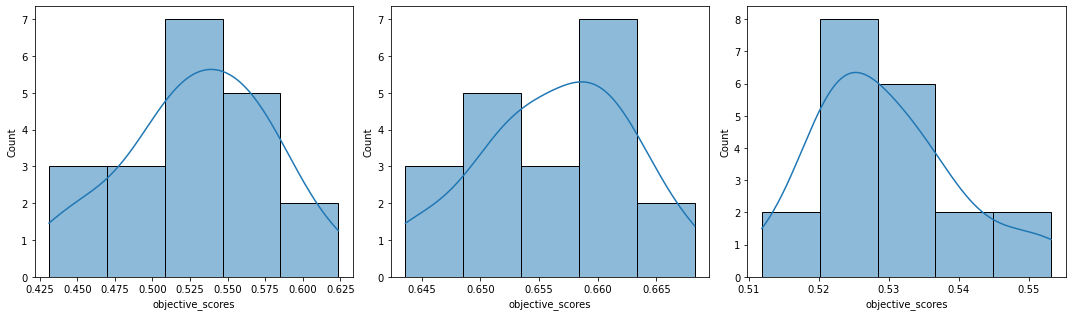

In [73]:
plt.rcParams["figure.figsize"] = [15.00, 4.50]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 3)
sns.histplot(data=solutions_linear_df, x="objective_scores", kde=True, bins=5, ax= axes[0])
sns.histplot(data=solutions_rbf_df, x="objective_scores", kde=True, bins=5, ax= axes[1])
sns.histplot(data=solutions_poly_df, x="objective_scores", kde=True, bins=5, ax= axes[2])
plt.show()

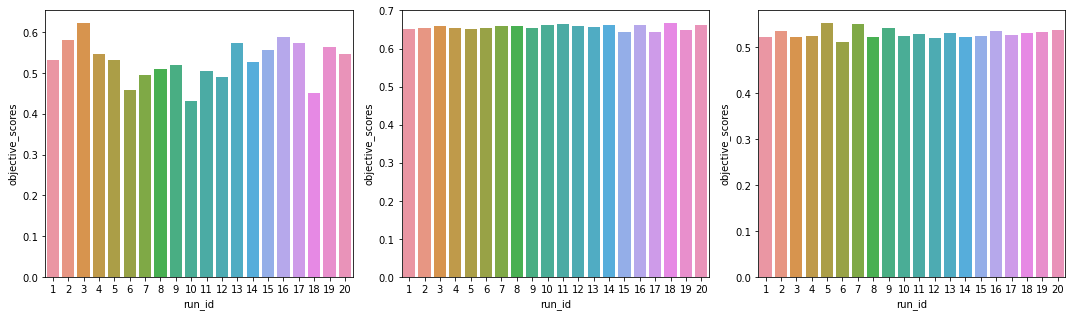

In [49]:
plt.rcParams["figure.figsize"] = [15.00, 4.50]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 3)
sns.barplot(data=solutions_linear_df, x="run_id", y="objective_scores", ax= axes[0])
sns.barplot(data=solutions_rbf_df, x="run_id", y="objective_scores", ax= axes[1])
sns.barplot(data=solutions_poly_df, x="run_id", y="objective_scores", ax= axes[2])
plt.show()

In [63]:
solutions_linear_df.sort_values(by='objective_scores', ascending=False, ignore_index=True)['plot'][0]

In [101]:
solutions_rbf_df.sort_values(by='objective_scores', ascending=False, ignore_index=True)['plot'][0]

In [66]:
solutions_poly_df.sort_values(by='objective_scores', ascending=False, ignore_index=True)['plot'][0]

### Convergence Plot of GA Features Selections

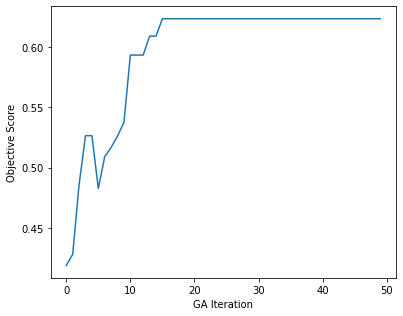

In [143]:
fig = solutions_linear_df.sort_values(by='objective_scores', ascending=False, ignore_index=True)['plot'][0]
dict_ =fig.to_dict()
plt.rcParams["figure.figsize"] = [5.70, 4.50]
plt.rcParams["figure.autolayout"] = True
sns.lineplot(x=dict_['data'][0]['x'], y=dict_['data'][0]['y'])
plt.xlabel("GA Iteration")
plt.ylabel("Objective Score")

plt.savefig('Analysis Plot Images/FS_lineplot_GA_obj_score_linear.png')
plt.show()

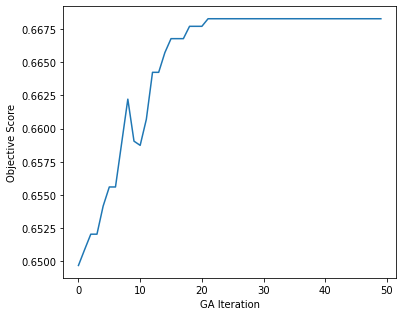

In [144]:
fig = solutions_rbf_df.sort_values(by='objective_scores', ascending=False, ignore_index=True)['plot'][0]
dict_ =fig.to_dict()
plt.rcParams["figure.figsize"] = [5.70, 4.50]
plt.rcParams["figure.autolayout"] = True
sns.lineplot(x=dict_['data'][0]['x'], y=dict_['data'][0]['y'])
plt.xlabel("GA Iteration")
plt.ylabel("Objective Score")

plt.savefig('Analysis Plot Images/FS_lineplot_GA_obj_score_rbf.png')
plt.show()

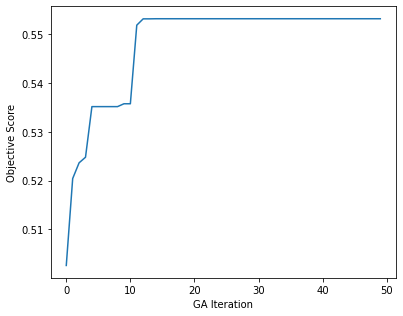

In [145]:
fig = solutions_poly_df.sort_values(by='objective_scores', ascending=False, ignore_index=True)['plot'][0]
dict_ =fig.to_dict()
plt.rcParams["figure.figsize"] = [5.70, 4.50]
plt.rcParams["figure.autolayout"] = True
sns.lineplot(x=dict_['data'][0]['x'], y=dict_['data'][0]['y'])
plt.xlabel("GA Iteration")
plt.ylabel("Objective Score")

plt.savefig('Analysis Plot Images/FS_lineplot_GA_obj_score_poly.png')
plt.show()

In [72]:
solutions_linear_df.sort_values(by='objective_scores', ascending=False, ignore_index=True)['selected_features'][0]

['AMR',
 'nAtom',
 'nC',
 'nX',
 'ATS1m',
 'ATS4m',
 'ATS5m',
 'ATS1v',
 'ATS2v',
 'ATS4v',
 'ATS5v',
 'ATS6v',
 'ATS7v',
 'ATS8v',
 'ATS0e',
 'ATS3e',
 'ATS4e',
 'ATS6e',
 'ATS0p',
 'ATS5p',
 'ATS7p',
 'ATS2i',
 'ATS6i',
 'ATS8i',
 'ATS4s',
 'AATS0m',
 'AATS1m',
 'AATS5m',
 'AATS6m',
 'AATS7m',
 'AATS0v',
 'AATS3v',
 'AATS4v',
 'AATS8v',
 'AATS1i',
 'AATS2i',
 'AATS4i',
 'AATS5i',
 'AATS8i',
 'AATS2s',
 'AATS5s',
 'AATS8s',
 'ATSC0m',
 'ATSC1m',
 'ATSC5m',
 'ATSC6m',
 'ATSC7m',
 'ATSC0v',
 'ATSC1v',
 'ATSC3v',
 'ATSC0e',
 'ATSC5e',
 'ATSC6e',
 'ATSC7e',
 'ATSC8e',
 'ATSC1p',
 'ATSC4p',
 'ATSC6p',
 'ATSC7p',
 'ATSC8p',
 'ATSC0i',
 'ATSC1i',
 'ATSC2i',
 'ATSC7i',
 'ATSC8i',
 'ATSC0s',
 'ATSC1s',
 'ATSC2s',
 'ATSC4s',
 'ATSC5s',
 'ATSC6s',
 'ATSC7s',
 'AATSC3m',
 'AATSC1v',
 'AATSC3v',
 'AATSC4v',
 'AATSC8v',
 'SpMax_DzZ',
 'SpDiam_DzZ',
 'SpMAD_DzZ',
 'EE_DzZ',
 'VR1_DzZ',
 'VR2_DzZ',
 'SpAbs_Dzm',
 'SpAD_Dzm',
 'EE_Dzm',
 'VE3_Dzm',
 'VR3_Dzm',
 'SpAbs_Dzv',
 'SpMax_Dzv',
 'SpDiam_Dzv'